# Introduction
 In this notebook, we analyze a dataset related to housing prices in the USA. We will explore the data, engineer new features, and build a linear regression model to predict house prices. Finally, we will evaluate the model's performance and interpret the results.

In [1]:
# Calculate and display evaluation metrics to assess model performance:
# - Mean Absolute Error (MAE)
# - Mean Squared Error (MSE)
# - R-squared (R2) Score
# Import necessary libraries for data manipulation, visualization, and model building

import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("USA_Housing _Dataset.csv")
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014-05-10 00:00:00,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA
8,2014-05-10 00:00:00,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle,WA 98136,USA
9,2014-05-11 00:00:00,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle,WA 98122,USA


In [3]:
# Check for missing values in the dataset
#check null values  
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [4]:
# Investigating the 'view' column to see if there are properties with a view.
ze=df['view']!=0
ze.sum()

np.int64(418)

In [5]:
# Convert the 'bathrooms' column to integer type, as it makes more sense for analysis
df['bathrooms']=df['bathrooms'].apply(np.int64)

 We create new features to enhance the predictive power of our model. For example, 'price_per_sqft' normalizes the price by the size of the house, and 'house_age' reflects the potential impact of the property's age on its value.


In [6]:
# Feature Engineering: Creating new features to enhance model performance
# - 'price_per_sqft': Price per square foot
# - 'total_square_footage': Sum of above-ground and basement square footage
# - 'house_age': Age of the house calculated from the year built
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['total_square_footage']= df['sqft_above']+df['sqft_basement']
df['house_age']=2024-df['yr_built']



In [7]:
# Adding a binary feature to indicate whether a house has been renovated.
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)


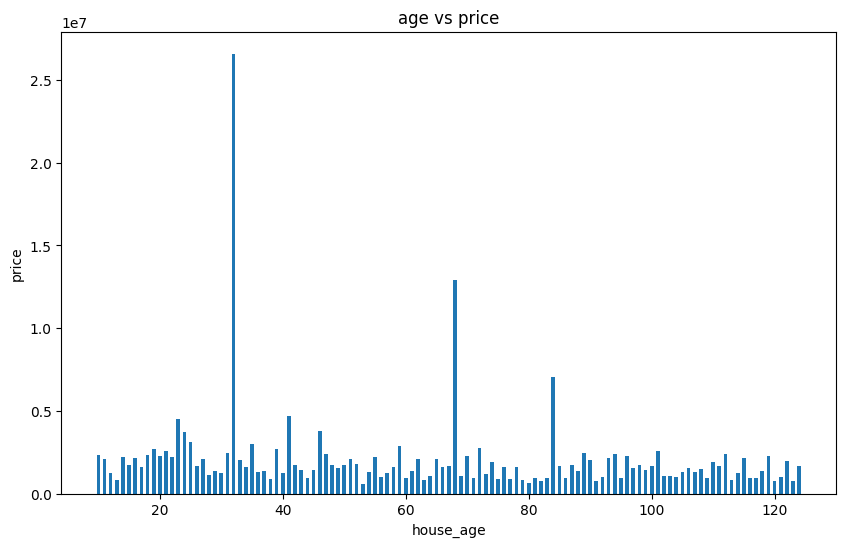

In [8]:
# Visualizing the relationship between features like house age, condition, and price.
# This helps us understand how these factors influence the target variable (price).

plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(df['house_age'],df['price'], width=0.6)

# Adding labels and title
plt.ylabel('price')
plt.xlabel('house_age')
plt.title('age vs price')

# Display the plot
plt.show()

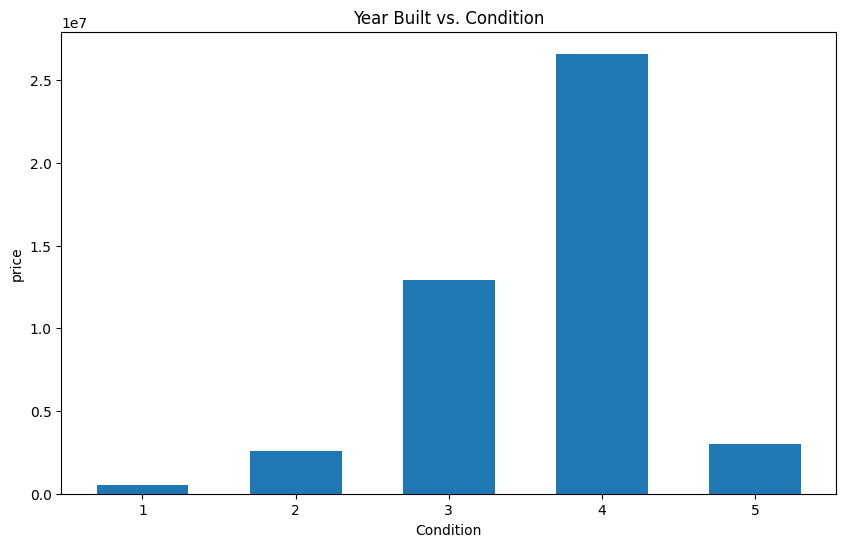

In [9]:
# Visualizing the relationship between features like house age, condition, and price.
# This helps us understand how these factors influence the target variable (price).

# Visualize the relationship between a feature (like house age or condition) and price using a bar plot
#we have one column condition and we want to know how it does effect the price

# Simple bar plot with just data points
# Simple bar plot of 'Year Built' and 'Condition'
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(df['condition'],df['price'], width=0.6)

# Adding labels and title
plt.ylabel('price')
plt.xlabel('Condition')
plt.title('Year Built vs. Condition')

# Display the plot
plt.show()

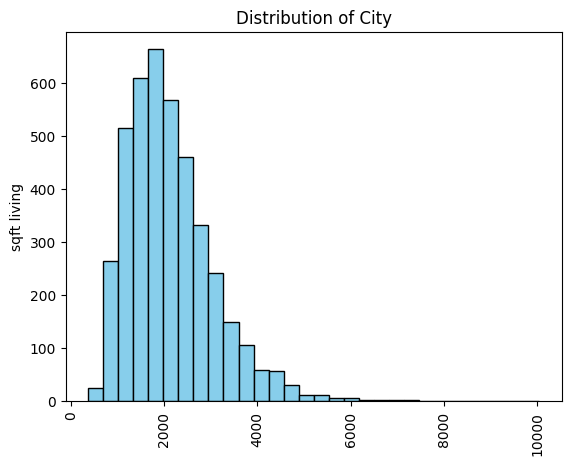

In [10]:
plt.hist(df["sqft_living"],bins=30,color='skyblue',edgecolor='black')
plt.title('Distribution of City')
plt.ylabel('sqft living')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

In [11]:
#  Reorder columns

df = df[['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','price_per_sqft','total_square_footage','house_age','street','city','statezip','country']]


In [12]:
#create a correlation matrix 
df.iloc[:,1:-4] = df.iloc[:,1:-4].apply(pd.to_numeric, errors='coerce')
corr = df.iloc[:,1:-4].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft,total_square_footage,house_age
price,1.000000,0.188765,0.308024,0.418528,0.045964,0.143180,0.131401,0.217553,0.030327,0.355214,0.204066,0.027067,-0.028272,0.828392,0.418528,-0.027067
bedrooms,0.188765,1.000000,0.497361,0.590110,0.065747,0.178908,-0.001286,0.105512,0.016503,0.478124,0.329862,0.153514,-0.069439,-0.070139,0.590110,-0.153514
bathrooms,0.308024,0.497361,1.000000,0.710143,0.098939,0.459853,0.076526,0.203929,-0.122569,0.646247,0.265494,0.402303,-0.191066,-0.017521,0.710143,-0.402303
sqft_living,0.418528,0.590110,0.710143,1.000000,0.194226,0.345130,0.126157,0.308098,-0.069315,0.874881,0.439053,0.296545,-0.124646,-0.046797,1.000000,-0.296545
sqft_lot,0.045964,0.065747,0.098939,0.194226,1.000000,-0.001113,0.019229,0.071264,0.012016,0.203190,0.023567,0.047224,-0.020308,-0.025763,0.194226,-0.047224
floors,0.143180,0.178908,0.459853,0.345130,-0.001113,1.000000,0.021278,0.030604,-0.275212,0.524777,-0.261826,0.470139,-0.234445,-0.012364,0.345130,-0.470139
waterfront,0.131401,-0.001286,0.076526,0.126157,0.019229,0.021278,1.000000,0.359237,0.004027,0.081076,0.109736,-0.031891,0.014030,0.031131,0.126157,0.031891
view,0.217553,0.105512,0.203929,0.308098,0.071264,0.030604,0.359237,1.000000,0.064440,0.167270,0.325002,-0.067859,0.028837,0.038979,0.308098,0.067859
condition,0.030327,0.016503,-0.122569,-0.069315,0.012016,-0.275212,0.004027,0.064440,1.000000,-0.183599,0.197656,-0.400394,-0.187971,0.046726,-0.069315,0.400394
sqft_above,0.355214,0.478124,0.646247,0.874881,0.203190,0.524777,0.081076,0.167270,-0.183599,1.000000,-0.051039,0.416525,-0.163368,-0.043246,0.874881,-0.416525


Distribution of cities 

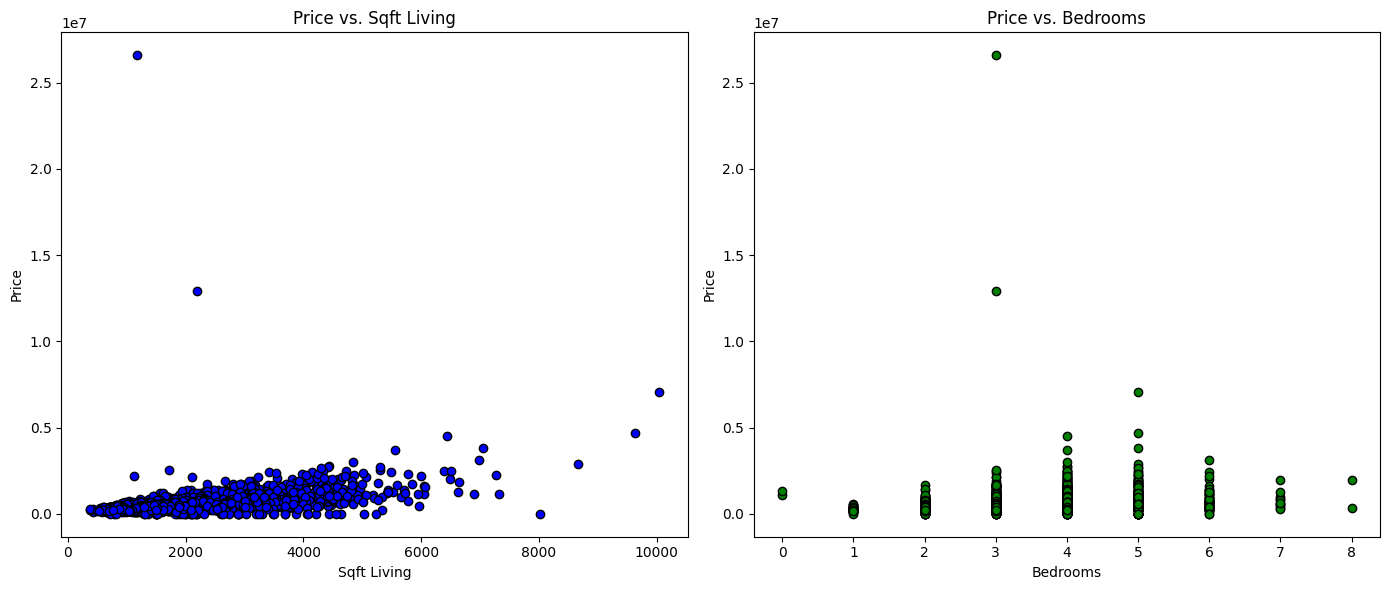

In [13]:

# Create scatter plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for price vs sqft_living
ax[0].scatter(df['sqft_living'], df['price'], color='blue', edgecolor='black')
ax[0].set_title('Price vs. Sqft Living')
ax[0].set_xlabel('Sqft Living')
ax[0].set_ylabel('Price')

# Scatter plot for price vs bedrooms
ax[1].scatter(df['bedrooms'], df['price'], color='green', edgecolor='black')
ax[1].set_title('Price vs. Bedrooms')
ax[1].set_xlabel('Bedrooms')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

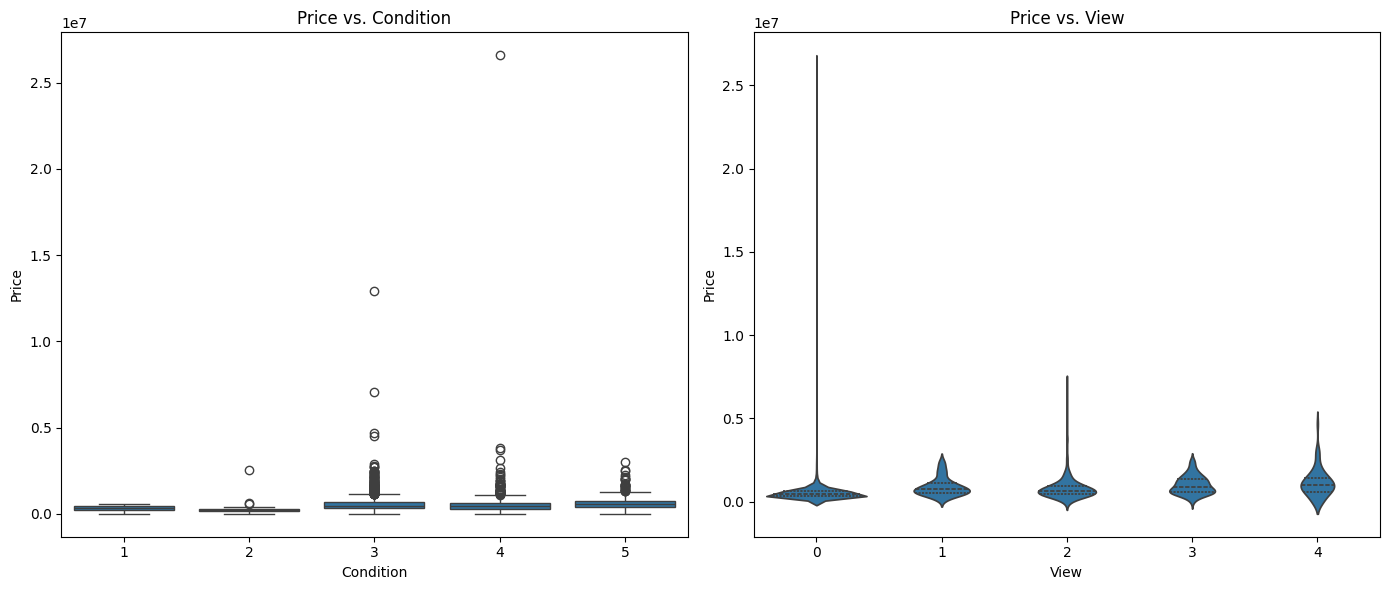

In [14]:
import seaborn as sns
# Plotting Price vs. Condition using box plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Price')

# Plotting Price vs. View using violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='view', y='price', data=df, inner="quartile")
plt.title('Price vs. View')
plt.xlabel('View')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [15]:
#we define the Feature variables 
X= df.iloc[:,2:-4]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft,total_square_footage,house_age
0,3.0,2,1340,1384,3.0,0,0,3,1340,0,2008,0,280.597015,1340,16
1,4.0,3,3540,159430,2.0,0,0,3,3540,0,2007,0,225.988701,3540,17
2,5.0,6,7270,130017,2.0,0,0,3,6420,850,2010,0,307.962586,7270,14
3,3.0,2,998,904,2.0,0,0,3,798,200,2007,0,324.649299,998,17
4,5.0,2,3060,7015,1.0,0,0,5,1600,1460,1979,0,179.705882,3060,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.0,1,1510,6360,1.0,0,0,4,1510,0,1954,1979,204.083885,1510,70
4136,3.0,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,365.981735,1460,41
4137,3.0,2,3010,7014,2.0,0,0,3,3010,0,2009,0,138.506368,3010,15
4138,4.0,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,97.320574,2090,50


In [16]:
#we define the target variable here it will be the price 
Y=df["price"]

In [17]:
# Scaling the features to ensure they are on a similar scale.
# This is particularly important for linear models, where large disparities in feature scales can bias the results.

# Normalize the features using MinMaxScaler to ensure all features are on a similar scale
scaler= MinMaxScaler()
X_normalized=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
print(X_normalized)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0        0.375   0.333333     0.100310  0.000695     0.8         0.0   0.0   
1        0.500   0.500000     0.327818  0.147909     0.4         0.0   0.0   
2        0.625   1.000000     0.713547  0.120512     0.4         0.0   0.0   
3        0.375   0.333333     0.064943  0.000248     0.4         0.0   0.0   
4        0.625   0.333333     0.278180  0.005940     0.0         0.0   0.0   
...        ...        ...          ...       ...     ...         ...   ...   
4135     0.375   0.166667     0.117890  0.005330     0.0         0.0   0.0   
4136     0.375   0.333333     0.112720  0.006460     0.4         0.0   0.0   
4137     0.375   0.333333     0.273009  0.005939     0.4         0.0   0.0   
4138     0.500   0.333333     0.177870  0.005581     0.0         0.0   0.0   
4139     0.375   0.333333     0.115822  0.006952     0.4         0.0   0.0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [18]:
# Split the dataset into training and testing sets (80% train, 20% test)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [19]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 85677.07417761715
Mean Squared Error (MSE): 23038297730.341656
R-squared: 0.7802432400819016


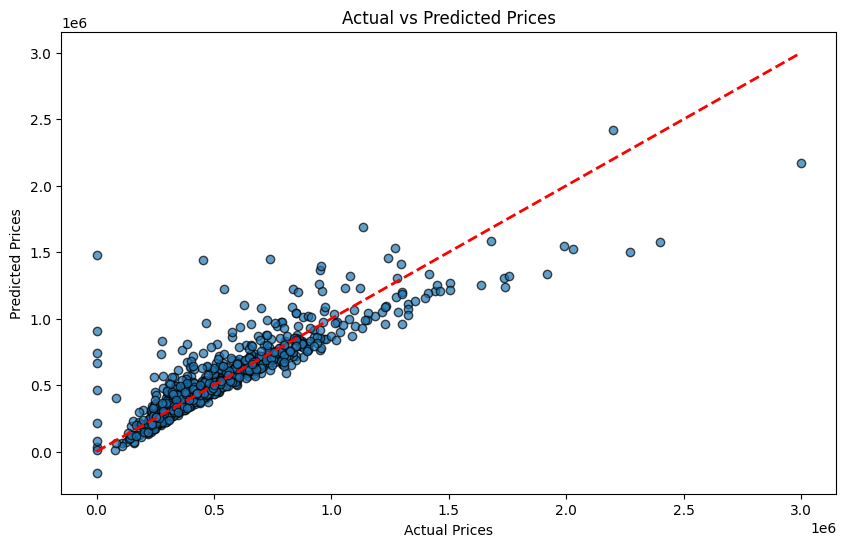

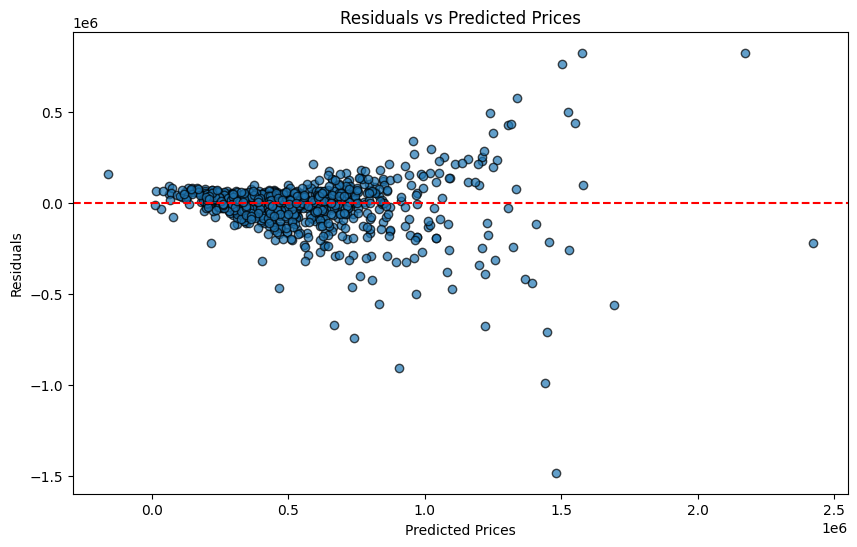

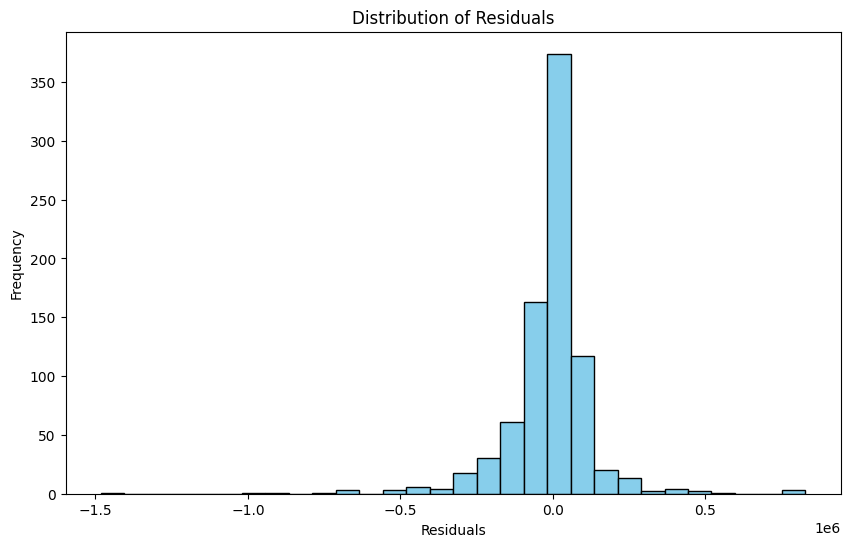

In [21]:
# Residual Analysis
# By plotting the residuals, we can check if they are randomly distributed, which would indicate a good model fit.
# Any patterns in the residuals could suggest issues like heteroscedasticity or non-linearity, prompting further investigation.

# Plot the residuals to evaluate the model's performance:
# - Residuals vs. Predicted Prices: Helps to identify patterns that might suggest model issues
# - Histogram of Residuals: Check if residuals are normally distributed

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

# Plot Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [22]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                       Coefficient
bedrooms             -2.109754e+05
bathrooms             5.407302e+04
sqft_living          -4.863970e+13
sqft_lot             -4.278237e+05
floors                4.220661e+04
waterfront            2.912693e+05
view                  5.630804e+04
condition             2.426685e+04
sqft_above            2.638941e+14
sqft_basement         1.662705e+14
yr_built             -2.632855e+18
yr_renovated          8.643290e+03
price_per_sqft        2.928887e+07
total_square_footage -2.849362e+14
house_age            -2.632855e+18


# Conclusion
 In this notebook, we explored the housing dataset, engineered new features, and trained a Linear Regression model. We evaluated the model's performance using various metrics and checked the residuals to assess the model fit. 